In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import datetime
import matplotlib.pyplot as plt

from helpers import *
from implementations import *
from Data_Cleaning import *
import json

%load_ext autoreload
%autoreload 2

y, tx, ids = load_csv_data("train.csv", sub_sample=False)


0.34303725602480284
0.3417982840093145
0.34145194414897057
0.34003022268066213
----
0.3267907154386734
0.32333690686439104
0.3194565519524914
----
0.2563356427155666
0.2545482347863558


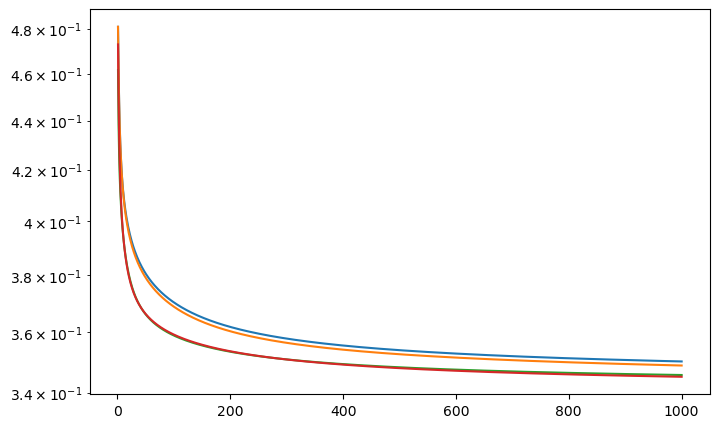

In [26]:
m0 = ["losses_0.npy","losses_0_M1_for_0_1.npy","losses_0_M2_for_0_1.npy","losses_0_M3_for_0_1_2.npy"]
m1 = ["losses_1.npy","losses_1_M1_for_0_1.npy","losses_1_M3_for_0_1_2.npy"]
m2 = ["losses_2.npy","losses_2_default_indicatrice.npy"]


fig, axs = plt.subplots(1,1,figsize =(8,5))
#fig.tight_layout(pad=1.0)
for i in range(len(m0)):
    loss = np.load(m0[i],allow_pickle=True)
    axs.semilogy(np.arange(1,1001),loss[:1000])
    print(min(loss))
    
    
print("----")
for i in range(len(m1)):
    loss = np.load(m1[i],allow_pickle=True)
    print(min(loss))
print("----")
for i in range(len(m2)):
    loss = np.load(m2[i],allow_pickle=True)
    print(min(loss))

## Outliers

In [2]:
outlierConstant = 1.5
list_ = []
for i in range(tx.shape[1]):
    a= tx[tx[:,i]!=-999,i]
    upper_quartile = np.percentile(a, 75)
    lower_quartile = np.percentile(a, 25)
    IQR = (upper_quartile - lower_quartile) * outlierConstant
    quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
    resultList = []
    for j in range(tx[:,i].shape[0]):
        if tx[j,i] >= quartileSet[0] and tx[j,i] <= quartileSet[1] and tx[j,i]!=-999:
            if not y in list_:
                list_.append(y)

len(np.array(list_).unique)

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [27]:
y, X, ids = load_csv_data("test.csv", sub_sample=False)

In [44]:
y_,ids_ = prediction_on_test_set()

/Users/kieranvaudaux/Desktop/ml-project-1-pml1/Data_Cleaning.py:172: RuntimeWarning: invalid value encountered in true_divide
  build_poly_cross_terms(X_[:,[x for x in angle_col_complement if x <= 29]],3,True,13),


In [51]:
create_csv_submission(ids_, y_, "final_sub3.csv")

In [33]:
information_normalisation = np.load('information_transformation_final.npz',allow_pickle=True)

In [54]:
import json
with open('save_param/information_transformation_final.json', 'rb') as fp:
        information_normalisation = json.load(fp)

FileNotFoundError: [Errno 2] No such file or directory: 'save_param/information_transformation_final.json'

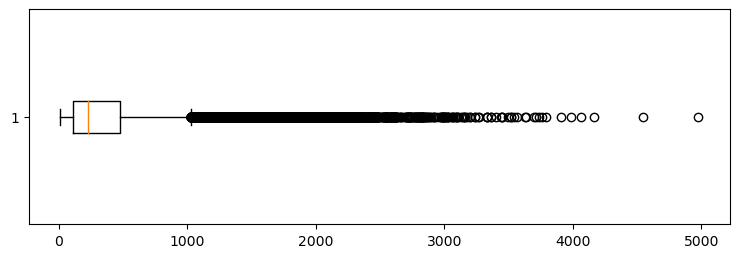

4386


In [30]:
fig, axs = plt.subplots(1,1,figsize =(8,3))
fig.tight_layout(pad=2.0)

axs.boxplot(tx[tx[:,5]!=-999,5],vert=False)



plt.show()
print(sum(tx[tx[:,5]!=-999,5]>1100))

# Skewed data and bimodale

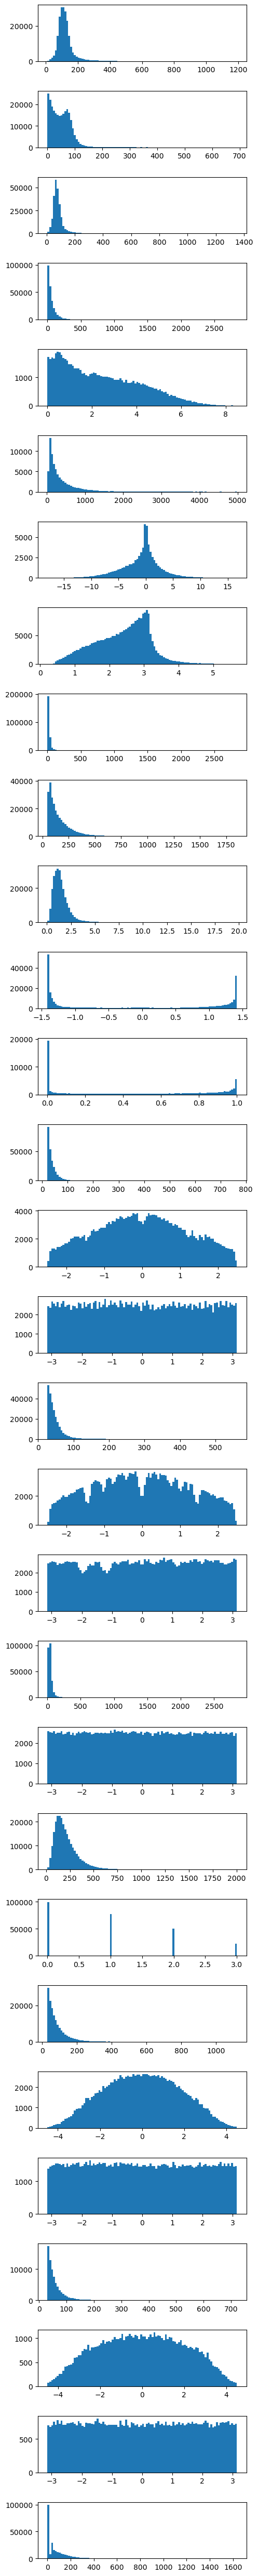

In [8]:
fig, axs = plt.subplots(tx.shape[1],1,figsize =(5,50))
fig.tight_layout(pad=2.0)

for i in range(tx.shape[1]):
    axs[i].hist(tx[tx[:,i]!=-999,i],bins=100)

plt.show()

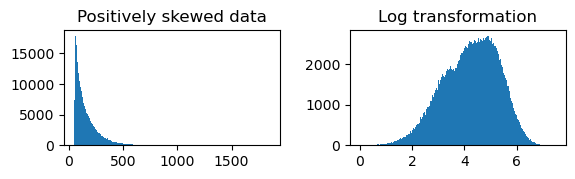

In [10]:
fig, ax = plt.subplots(1,2,figsize =(6,2))
fig.tight_layout(pad=2.0)
#fig.suptitle("Log transformation of skewed data")
i =9
ax[0].set_title("Positively skewed data")
ax[1].set_title("Log transformation")
ax[1].hist(np.log(tx[tx[:,i]!=-999,i]-min(tx[tx[:,i]!=-999,i])+1),bins=250)
ax[0].hist(tx[tx[:,i]!=-999,i],bins=250)
plt.savefig("Log_transformation.png", dpi=300, bbox_inches='tight')
plt.show()


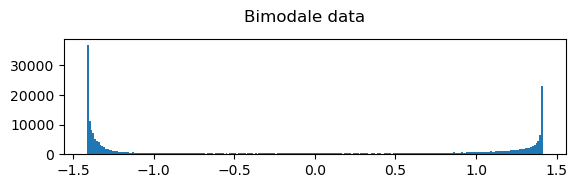

In [53]:
fig, ax = plt.subplots(1,1,figsize =(6,2))
fig.tight_layout(pad=2.0)
fig.suptitle("Bimodale data")
i =11

ax.hist(tx[tx[:,i]!=-999,i],bins=250)
plt.savefig("bimodale.png", dpi=300, bbox_inches='tight')
plt.show()